# Links e Estrutura

## Conteudo

**Parte 1: Procedimentos de dados geográficos em GeoPandas\Shapely**
- Simplificar Dados
- Spatial Relations e Alterações Geometria
- Selection by Location (point BGRI)
- Spatial Joins
Spatial Operations (Intersections, Buffer, 
- Buffers e Overlay
- Exportar Dados


**Dataset a utilizar**
- Freguesias AML: D:\DADOS\PYTHON_2023\CAOPFR_AML.gpkg\main.CAOPFR_AML
- BGRI2021: D:\DADOS\PYTHON_2023\BGRI2021_1106.gpkg\main.BGRI2021_1106
- Paragens de autocarro de OSM (download): GPK_CARRIS.gpkg
- Dados de Input do OSM

## Links com informação

**Notebooks gerais com apresentação de diferentes técnicas:**
- Automating GIS Processes 2023 (formação geral, que aborda algumas técnicas mais avançadas): https://autogis-site.readthedocs.io/en/latest/index.html
* Course Spatial Toughts (sem PYSAL): https://courses.spatialthoughts.com/python-dataviz.html
* Introduction Pytohn-GIs Course 2018: https://automating-gis-processes.github.io/CSC/index.html
* Não incluir na listagem: (Leveraging Geospatial Data in Python with GeoPandas - KDnuggets)[https://www.kdnuggets.com/leveraging-geospatial-data-in-python-with-geopandas]


**Lista de Links alguns metódos referidos:**
- [Kaggle Proximity Analysis](https://www.kaggle.com/code/alexisbcook/proximity-analysis)
- [Retrieving Open Street Map Data in Python](https://blog.devgenius.io/retrieving-open-street-map-data-in-python-436d2a5d6804)

- DataCamp
    - Notebook  (part 2 e 3): https://datascience103579984.wordpress.com/2019/11/25/working-with-geospatial-data-in-python-from-datacamp/2/
    - Automating GIS Process 2023: https://autogis-site.readthedocs.io/en/latest/index.html
- Spatial Overlays and Joins: https://pygis.io/docs/e_vector_overlay.html
- Spatial Joins: https://pygis.io/docs/e_spatial_joins.html

# Manipular Dados Geográficos

**Datasets**
- BGRI2021
- Paragens de autocarro de Carris (dados do OSM) 

## Operações Sobre a Coluna GeoMetry

### Simplificar
- Simplificar é importante
- Facilita a sua visualização

_**Atenção pode criar situações indesejadas!**_

In [ ]:
import geopandas as gpd
import folium

# Simplify: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.simplify.html
# Exemplo Importar os dados da BGRI2021 
# Caminho para o arquivo GeoPackage
gpk = r"C:\TEMP\BGRI2021_1106.gpkg"

# Ler os dados do GeoPackage para um GeoDataFrame
gdf1106 = gpd.read_file(gpk)
gdf1106_2 = gpd.read_file(gpk)
# Simplificar a geografia para uma precisão de 5 metros
# Experimenta - diferentes valores para ver o efeito na geometria
gdf1106_2['geometry'] = gdf1106_2['geometry'].simplify(tolerance=10)

# ------------------
# Mostrar a localização com Folium
# Obter Centroid
centroid = gdf1106.to_crs(epsg=4326).unary_union.centroid

# Criar Listagem com localização de latitude  longitude
center_map = [centroid.y, centroid.x]
# Criar Mapa e mostrar
folium_map = folium.Map(location=center_map, zoom_start=12, tiles='OpenStreetMap')

# Adicionar Geografia folium map
# folium.GeoJson constructor
folium.GeoJson(gdf1106).add_to(folium_map)

# Mudar a cor
style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000'}
folium.GeoJson(gdf1106_2, style_function=style_function).add_to(folium_map)

#  Widget para controloar os diferentes layers:
folium.LayerControl().add_to(folium_map)


display(folium_map)

# Visualizar o GeoDataFrame
#gdf1106.plot(column = 'DTMNFR21',
#              legend = False)

_**Lembra-se a maneira fácil e rápido de ver a geografia de uma GeoDataframe é explore()**_

Explore(): https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html

_Note-se como fizemos um simplify de poligonos são criados gaps e overlays_

In [ ]:
# Mostrar a geografia do GeoDataFrame
gdf1106_2.explore(column = 'DTMNFR21',
              legend = True,
                  edgecolor = 'black')

### Utilizar a Área de cada elemento

- Calcular População por M2

In [ ]:
print (gdf1106.info())

In [ ]:
# Codigo que mostra como calcular a população por KM2

# Verificar o CRS da GDF 
print (gdf1106.crs)
# Area 1º registo
print('BGRI21:', gdf1106.iloc[10].BGRI2021, 'Area:', gdf1106.iloc[10].geometry.area)

# Adicionar nova coluna 
# Caso GDF está noutra CRS será necessario uma correção: gdf1106['geometry'].to_crs(epsg=3857).area
gdf1106['AREA_KM2'] = gdf1106['geometry'].area / 1000000
gdf1106['INDIV_KM2'] = gdf1106['N_INDIVIDUOS'] / gdf1106['AREA_KM2']

# Mostrar resultado:
print(gdf1106[['DTMNFR21', 'N_INDIVIDUOS','AREA_KM2', 'INDIV_KM2']].head(10))


In [ ]:
# Mostrar resultado como mapa
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Definir figura:
f, ax = plt.subplots(1, figsize=(9, 9))

# Definir Legenda 
lgnd_kwds = {'loc': 'upper left', 
             'bbox_to_anchor': (1, 1.03), 
             'ncol': 3}

# Generate the choropleth and store the axis
# natural_breaks
gdf1106.plot(column=gdf1106.INDIV_KM2, 
              scheme='quantiles', # natural_breaks, quantiles, equal_interval 
              k=9, 
              cmap='PuBu', 
              legend=True,
              edgecolor = 'None', # sem outline
              legend_kwds  = lgnd_kwds,
              ax = ax)
 
# Remover frames, ticks e tick labels do axis
ax.set_axis_off()

plt.title('População por Km2')
plt.show()


### Alterar o tipo de Geometria


In [ ]:
print(gdf1106.info())

In [ ]:
import geopandas as gpd
import folium

# Criar um novo GeoDataFrame de pontos
gdf1106_points = gdf1106.copy()

# Neste momento a Geometria ainda é de Polygons:
print (gdf1106_points['geometry'].iloc[0].geom_type)


_Converter para Pontos_

In [ ]:

# Calcular o centróide de cada polígono
gdf1106_points['geometry'] = gdf1106['geometry'].centroid

# Calcular ponto dentro poligono
#gdf1106_points['geometry'] = gdf1106['geometry'].representative_point()

print("Geometria original e nova:",gdf1106.iloc[0]['geometry'].geom_type,gdf1106_points.iloc[0]['geometry'].geom_type)


_Visualizar Resultado_

In [ ]:
# Fazer Seleção dos Registos para facilitar visualização
gdf_pnt110657 = gdf1106_points[gdf1106_points['DTMNFR21'] == '110655']
gdf_poly110657 = gdf1106[gdf1106['DTMNFR21'] == '110655']

# --------------------------------------
# Mostrar a localização com Folium
# São muitos dados - visualização é lento
centroid = gdf_pnt110657.to_crs(epsg=4326).unary_union.centroid

# Criar Listagem com localização de latitude  longitude
center_map = [centroid.y, centroid.x]
# Criar Mapa e mostrar
folium_map = folium.Map(location=center_map, zoom_start=15, tiles='OpenStreetMap')

# Adicionar Geografia folium map
# folium.GeoJson constructor
folium.GeoJson(gdf_pnt110657).add_to(folium_map)
folium.GeoJson(gdf_poly110657).add_to(folium_map)

#  Widget para controloar os diferentes layers:
folium.LayerControl().add_to(folium_map)

display(folium_map)



### Criar nova Geografia a partir de um Dissolve


In [ ]:
import geopandas as gpd

# Codigo que mostra um dissolve das subsecções para freguesias
# Utilizar argumento aggfunc (default = first)

# Alternativa 1: DTMNFR21 passa a ser o index - sem reset_index()
# gdf1106_freg = gdf1106.dissolve(by='DTMNFR21', aggfunc='sum')

# Alternativa 2 reset_index para manter a coluna
gdf1106_freg = gdf1106.dissolve(by='DTMNFR21', aggfunc='sum').reset_index()


# Mostrar Resultado da nova gdf
print(gdf1106_freg.info())

# De seguido será necessária fazer limpeza e correção das colunas
# Apagar Colunas desnecessários
gdf1106_freg = gdf1106_freg.drop(columns=['BGRI2021','DTMNFRSEC21','SECNUM21','SSNUM21','SECSSNUM21','SUBSECCAO','NUTS1','NUTS2','NUTS3'])

# Mudar os valores das colunas nivel superior a DTMNFR21
gdf1106_freg['DTMN21'] = '1106'
gdf1106_freg['DT21'] = '1106'

gdf1106_freg.head()

In [ ]:
# Mostrar o resultado (a geografia do GeoDataFrame)
gdf1106_freg.explore(column = 'DTMNFR21',
              legend = True,
                  edgecolor = 'black')

## Operações entre diferentes Datasets
- Seleções entre 2 datasets (select by location)
- Spatial Joins entre 2 datasets


### Efetuar Spatial Join
- Importar dados dos paragens de autocarro em Lisboa
- Efetuar o Spatial Join
- Desenhar mapa com resultado
- Fazer a seleção de nº de pontos

Ajuda: 
- Spatial Joins em GeoPandas: https://geopandas.org/en/stable/gallery/spatial_joins.html 
- função SJOIN: https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html


#### Importar um Dataset com Paragens de Autocarro de OSM

In [ ]:
import geopandas as gpd
import folium

# Importar Paragens de autocarro
gpk = r"c:\temp\GPK_CARRIS2.gpkg"

# Ler os dados do GeoPackage para um GeoDataFrame
gdfCarris = gpd.read_file(gpk,encoding='utf-8')

print(gdfCarris.head())
# Total de 1983 registos
print(gdfCarris.info())


print('BGRI21:', gdfCarris.iloc[10].other_tags)

# ------------------
# Mostrar a localização 
gdfCarris.explore(legend = True,
                  edgecolor = 'black',
                  marker_type = 'marker')



#### Spatial Join de Polygons para Points

In [ ]:
# Realizar o spatial join
gdf_join = gpd.sjoin(gdf1106_freg, gdfCarris, how="inner", predicate="contains")

# Limitar Colunas:
# gdf_join = gpd.sjoin(gdf1106_freg[['DTMNFR21', 'geometry']], gdfCarris, how="left", predicate="contains")

print (f"Tipo de Geometria: {gdf_join['geometry'].iloc[0].geom_type}")
print (f"Nº de Registos Input: {len(gdf1106_freg)}")
print (f"Nº de Registos Output: {len(gdf_join)}", "\n")


gdf_join.info()



#### Join de Points para Polygons

- Obter a Freguesia para cada paragem de autocarro


In [ ]:
import geopandas as gpd

# Perform spatial join
gdf_join = gpd.sjoin(gdfCarris, gdf1106_freg[['DTMNFR21', 'geometry']], how='left', predicate='within')

# Mostrar Resultado
print (f"Tipo de Geometria: {gdf_join['geometry'].iloc[0].geom_type}")
print (f"Nº de Registos Input: {len(gdfCarris)}")
print (f"Nº de Registos Output: {len(gdf_join)}", "\n")

gdf_join[['osm_id','DTMNFR21']].head()

#### Juntar as 2 Operações

- Obter a Contagem das paragens por Freguesia



In [ ]:
gdf1106_freg.drop(columns=['n_paragens_x','n_paragens_y'], inplace=True)

In [ ]:
# Realiza o spatial join
'''
1. Fazer sjoin: resultado um GDF com o memso numero de registos que os pontos
2. Adicionar uma nova coluna n_paragens com total de registos existentes por Freguesia
3. Obter Dataframe com numero de Valores unicos 
4. Fazer merge do novo valor obtido com Geodataframe original
5. Apagar o objecto do join

'''
# Realizar o spatial join
# Resultado terá o mesmo nº de registos que gdfCarris
gdf_join = gpd.sjoin(gdf1106_freg, gdfCarris, how="inner", predicate="contains")

print (f"Nº de Registos Output Join: {len(gdf_join)}")


# Contar o número de pontos em cada polígono (novo atributo n_paragens)
# Informação está duplicada para cada Freguesia
gdf_join["n_paragens"] = gdf_join.groupby("DTMNFR21")["geometry"].transform("size")

# # Selecionar o primeiro valor de 'n_paragens' dentro de cada grupo 'DTMNFR21'
unique_values = gdf_join.groupby('DTMNFR21')['n_paragens'].first().reset_index()

#print(unique_values.info())

# Exibir o DataFrame resultante
#print(unique_values.head())

# Apagar coluna - caso repetir o codigo (o merge) sem recriar gdf1106
# gdf1106_freg.drop(columns=['n_paragens','n_paragens_x','n_paragens_y'], inplace=True)
gdf1106_freg = gdf1106_freg.merge(unique_values, on='DTMNFR21', how='left')

del gdf_join


# Exibir a GeoDataFrame resultante com o atributo 'n_paragens' adicionado
print(gdf1106_freg.info())
print(gdf1106_freg[['DTMNFR21', 'n_paragens']].head(10))



In [ ]:
# Desenhar mapa com resultado:
import geopandas as gpd
import matplotlib.pyplot as plt

# Definir Legenda 
lgnd_kwds = {'loc': 'upper left', 
             'bbox_to_anchor': (1, 1.03), 
             'ncol': 2}

# Generate the choropleth and store the axis
# natural_breaks
ax = gdf1106_freg.plot(column=gdf1106_freg.n_paragens, 
                      scheme='quantiles', # natural_breaks, quantiles, equal_interval 
                      k=5, 
                      cmap='YlGn', 
                      legend=True,
                      edgecolor = 'None', 
                      legend_kwds  = lgnd_kwds)
 
# Remover frames, ticks e tick labels do axis
ax.set_axis_off()

plt.title('Nº de paragens Carris')
plt.show()




#### Outra Possibilidade - Fazer seleção de nº de pontos para freguesia especifica

In [ ]:
# Fazer seleção de nº de pontos para freguesia especifica
from geopandas.tools import sjoin

# Selecionar o polígono específico da freguesia 110655 (Areeiro)
poligono_especifico = gdf1106_freg[gdf1106_freg['DTMNFR21'] == '110655']

# Fazer Join com gdfCArris para obter os pontos
joined = sjoin(gdfCarris, poligono_especifico, how='inner', predicate='within')

# Contar quantos pontos estão dentro do polígono específico
quantidade_pontos = len(joined)

# Mostrar o resultado
print(f"Quantidade de paragens de autocarro dentro a freguesia 110655: {quantidade_pontos}")


### Efetuar um Overlay

- Experimentar diferentes opções de overlay

Ajuda função overlay: https://geopandas.org/en/stable/docs/reference/api/geopandas.overlay.html

_Exemplo de cortar um círculo (buffer) em volta de um ponto_

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Criar variáveis para a figura
f, ax = plt.subplots(1, figsize=(9, 9))

# Criar um objeto Point
# Atenção primeiro o valor x (longitude) e depois o y (latitutde) - Google Maps devolve Latitude, Longitude
ponto = Point(-9.184111016,38.768216306)
# 38.76821630632057, -9.184111016081756
# Cria um GeoDataFrame do ponto com CRS WGS84
gdf_ponto = gpd.GeoDataFrame([1], geometry=[ponto], crs='EPSG:4326')

# Mudar a projeção do pontos para a projeção da gdf1106:
gdf_ponto = gdf_ponto.to_crs(gdf1106.crs)

print (f"Tipo de Geometria: {gdf_ponto['geometry'].iloc[0].geom_type}")

# Cria um buffer de 500 metros em volta do ponto
gdf_ponto['geometry'] = gdf_ponto.geometry.buffer(1500)
print (f"Tipo de Geometria: {gdf_ponto['geometry'].iloc[0].geom_type}")

# Realiza a interseção entre o buffer e os polígonos
# Opções: intersection’, ‘union’, ‘identity’, ‘symmetric_difference’ or ‘difference’ 
intersecao = gpd.overlay(gdf1106, gdf_ponto, how='symmetric_difference')

# Visualizar o Resultado
intersecao.plot(column = 'DTMNFR21',
              legend = False,
               ax = ax)

# Add basemap do contextily
ctx.add_basemap(
    ax,
    crs=intersecao.crs,
    source=ctx.providers.CartoDB.VoyagerNoLabels,
)


ax.set_axis_off()


## Exportar Dados do GeoDataFrame

Ajuda sobre processo exportação e importação: https://geopandas.org/en/stable/docs/user_guide/io.html
Função GeoDataFrame.to_file: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html#geopandas.GeoDataFrame.to_file


Principais formatos de Output:
- Shapefile: Sem necessidade de especificar driver
- GeoJSON: driver='GeoJSON'
- GeoPackage: driver='GPKG'


In [ ]:
gdf1106_freg.to_file(r'c:\temp\c2021_fr1106.gpkg', layer='FR1106', driver="GPKG")

_Listar os diferentes outputs possíveis_

In [ ]:
import fiona
fiona.supported_drivers

## Exemplo obter informação a partir de uma seleção dentro um Buffer

- Introduzir um ponto, valores latitude e longitude
- Criar um Buffer em volta de um ponto
- Fazer o cálculo da população nas subsecções envolventes



### Importar o Dados

Podem fazer download de outros GPK no site do INE: https://mapas.ine.pt/download/index2021.phtml


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Simplify: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.simplify.html
# Exemplo Importar os dados da BGRI2021 
# Caminho para o arquivo GeoPackage
gpk = r'c:\temp\BGRI2021_1106.gpkg'

# Ler os dados do GeoPackage para um GeoDataFrame
gdf1106 = gpd.read_file(gpk,encoding='utf-8')





### Função folium que mostra um mapa Folium

In [ ]:
# Function mostrar folium
def mostrarFolium(gdfExtent,gdfDesenhar):
    centroid = gdfExtent.to_crs(epsg=4326).unary_union.centroid

    # Criar Listagem com localização de latitude  longitude
    center_map = [centroid.y, centroid.x]
    # Criar Mapa e mostrar
    folium_map = folium.Map(location=center_map, zoom_start=15, tiles='OpenStreetMap')

    # Adicionar Geografia folium map
    # folium.GeoJson constructor
    for lay in gdfDesenhar:
        folium.GeoJson(lay).add_to(folium_map)
    

    display(folium_map)
    
    
    

### Executar o Buffer

In [ ]:
from shapely.geometry import Point

# Cria um objeto Point (podem escolher um ponto no google maps)
# Atenção primeiro o valor x (longitude) e depois o y (latitutde)
ponto = Point(-9.137616,38.738561)

# Cria um GeoDataFrame do ponto com CRS WGS84
gdf_ponto = gpd.GeoDataFrame([1], geometry=[ponto], crs='EPSG:4326')

# Manteer ponto Original
gdf_ponto_original = gdf_ponto.copy()


# Mudar a projeção:
gdf_ponto = gdf_ponto.to_crs(gdf1106.crs)

# Fazer o Buffer
gdf_ponto['geometry'] = gdf_ponto.geometry.buffer(500)

# Executar o Spatial join entre o ponto e as subsecções da BGRI2021
join = gpd.sjoin(gdf1106, gdf_ponto, how="inner", predicate='intersects')

# Somar os valores do atributo N_INDIVIDUOS
soma = join['N_INDIVIDUOS'].sum()

print(f"Soma de N_INDIVIDUOS nos polígonos selecionados: {soma} em volta do ponto ({ponto.y},{ponto.x})")


#-----------------------------------------------------------------
# Mostrar 
mostrarFolium(gdf_ponto,[gdf_ponto,gdf_ponto_original])






## Desafio

1. Criar Sumatórios por Freguesia a partir dos dados do C2021 no portal do INE 

a. Faz download do gpk de um municipio no link: https://mapas.ine.pt/download/index2021.phtml

> 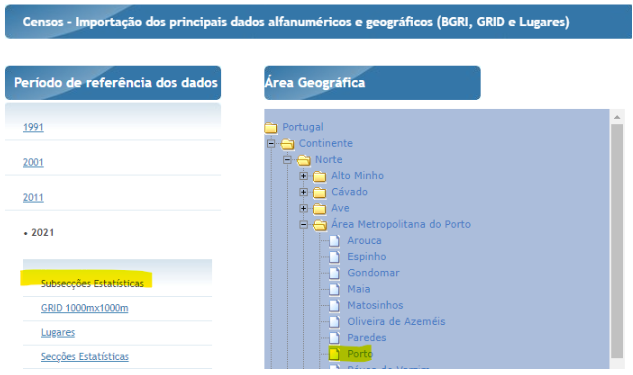  

b. Juntar as subsecções para criar a geografia por freguesia

c. Exportar o GDF de resultado para um GeoPackage

2. Repetir o processo de obter a população par aum ponto com dados de um outro municipio e outro ponto (ver §2.4)


